# Lab 7.05 - Time series analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_absolute_error
from datetime import datetime

### Exercise 5 - Alcoholic beverages sales

The file US Retail.csv contains monthly retail sales of beer, wine, and liquor at U.S. liquor stores.

- Is seasonality present in these data?
- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model. 
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
df.head()

,Total Sales
Month,
1992-01-01,1519
1992-02-01,1551
1992-03-01,1606
1992-04-01,1686
1992-05-01,1834


In [31]:
# train = df[df['Month'] ]
train = df.loc[:'2008-12-01']
test = df.loc['2009-01-01':]

<Axes: xlabel='Month'>

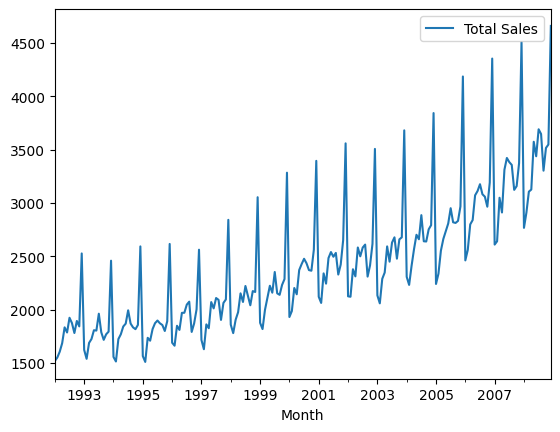

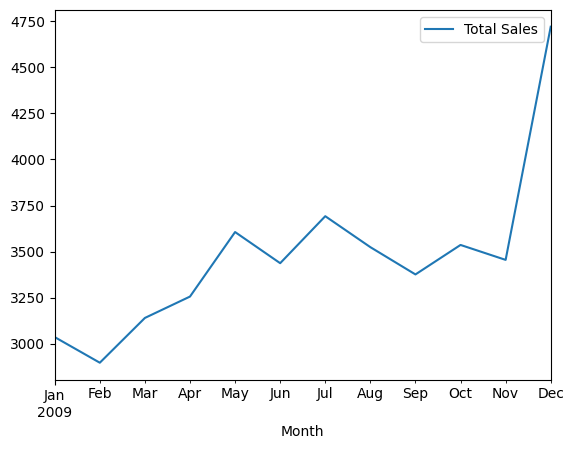

In [33]:
train.plot()
test.plot()

c:\Users\jonah\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jonah\AppData\Local\Temp\ipykernel_22608\2753896080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DES'] = data_des.fittedvalues


<Axes: xlabel='Month'>

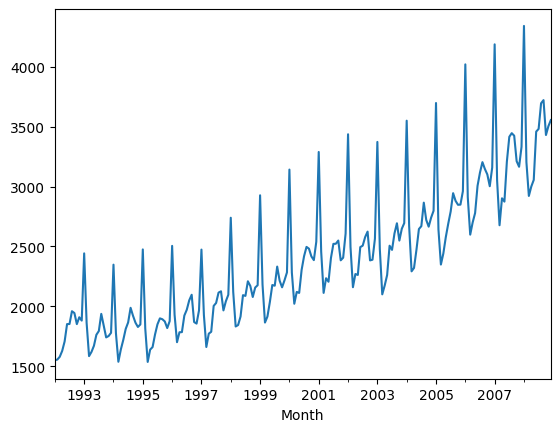

In [35]:
data_des = Holt(train['Total Sales']).fit(
    smoothing_level=.7,
    smoothing_trend=.2,
    optimized=False)
train['DES'] = data_des.fittedvalues
data_des.fittedvalues.plot()

c:\Users\jonah\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jonah\AppData\Local\Temp\ipykernel_22608\1697180095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['dub'] = smooth.fittedvalues


<Axes: xlabel='Month'>

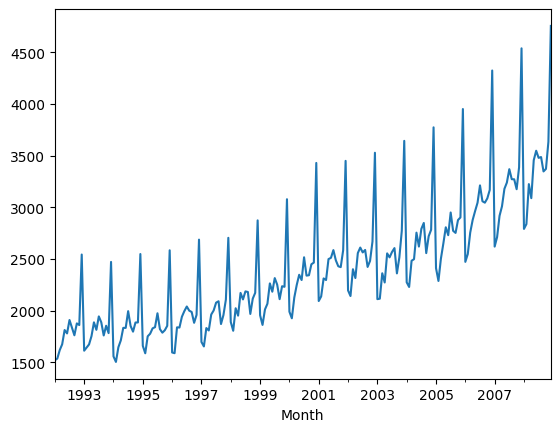

In [50]:
smooth = ExponentialSmoothing(train['Total Sales'], trend='add', initialization_method="estimated", seasonal='add', seasonal_periods=12).fit()

train['dub'] = smooth.fittedvalues
smooth.fittedvalues.plot()

<Axes: xlabel='Month'>

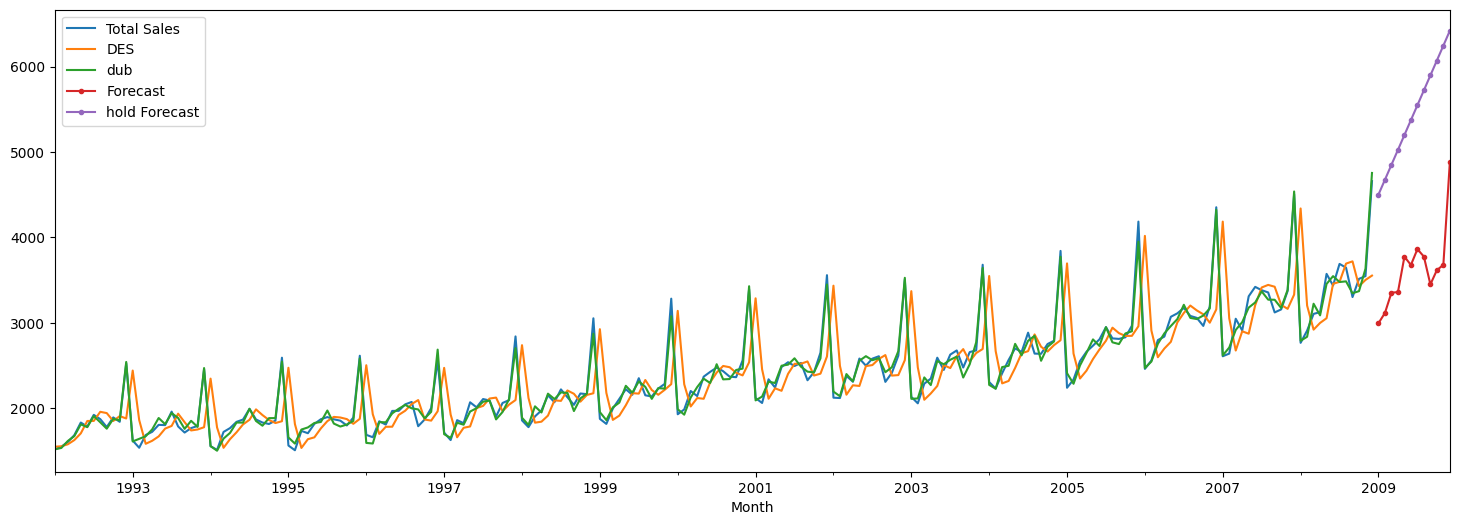

In [59]:

train.plot(y=['Total Sales',  'DES', 'dub'], figsize=[18,6])
data_ses_fcast = smooth.forecast(len(test))
data_hold_fcast = data_des.forecast(len(test))
data_ses_fcast.plot(marker='.', legend=True, label='Forecast')
data_hold_fcast.plot(marker='.', legend=True, label='hold Forecast')

In [60]:
df_clean = train.dropna()

# 5. Calculate MAE for each model
mae_results = {
    'dub': mean_absolute_error(test['Total Sales'], data_ses_fcast),
    'DES': mean_absolute_error(test['Total Sales'], data_hold_fcast),
}

print("MAE results:")
for model, mae in mae_results.items():
    print(f"{model}: {mae:.3f}")

MAE results:
dub: 163.310
DES: 1988.526


## Source
Business Analytics Data Analysis & Decision Making 